
# Titanic Dataset Preprocessing and Analysis

## Step 1: Import and Explore the Dataset

The dataset consists of 891 rows and 12 columns. Key observations:
- Missing values in `Age`, `Cabin`, and `Embarked`.
- `Cabin` has too many missing values and was dropped.
- Mix of categorical and numerical features.

In [13]:
import pandas as pd
# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Copy dataframe
df_clean = df.copy()
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Step 2: Handle Missing Values
- `Age`: Imputed using the median.
- `Embarked`: Imputed using the most frequent value.
- `Cabin`: Dropped due to excessive missing data.

In [14]:
from sklearn.impute import SimpleImputer
# Drop Cabin
df_clean.drop(columns=['Cabin'], inplace=True)
# Impute Age with median
age_imputer = SimpleImputer(strategy='median')
df_clean['Age'] = age_imputer.fit_transform(df_clean[['Age']]).ravel()
# Impute Embarked with most frequent
embarked_imputer = SimpleImputer(strategy='most_frequent')
df_clean['Embarked'] = embarked_imputer.fit_transform(df_clean[['Embarked']]).ravel()

## Step 3: Encode Categorical Features
- `Sex` and `Embarked` converted to numeric using Label Encoding.

In [15]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
label_encoders = {}
categorical_cols = ['Sex', 'Embarked']
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
print(label_encoders)

{'Sex': LabelEncoder(), 'Embarked': LabelEncoder()}


## Step 4: Normalize Numerical Features
- StandardScaler was used on `Age`, `Fare`, `SibSp`, and `Parch`.

In [16]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical columns
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,0.432793,-0.473674,PC 17599,0.786845,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,-0.181487,-0.474545,-0.473674,211536,-0.386671,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,-0.796286,-0.474545,-0.473674,112053,-0.044381,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,-0.104637,0.432793,2.008933,W./C. 6607,-0.176263,2
889,890,1,1,"Behr, Mr. Karl Howell",1,-0.258337,-0.474545,-0.473674,111369,-0.044381,0


## Step 5: Outlier Detection and Removal
- Boxplots used to visualize outliers.
- Outliers removed using the IQR method for the 4 standardized numerical columns.

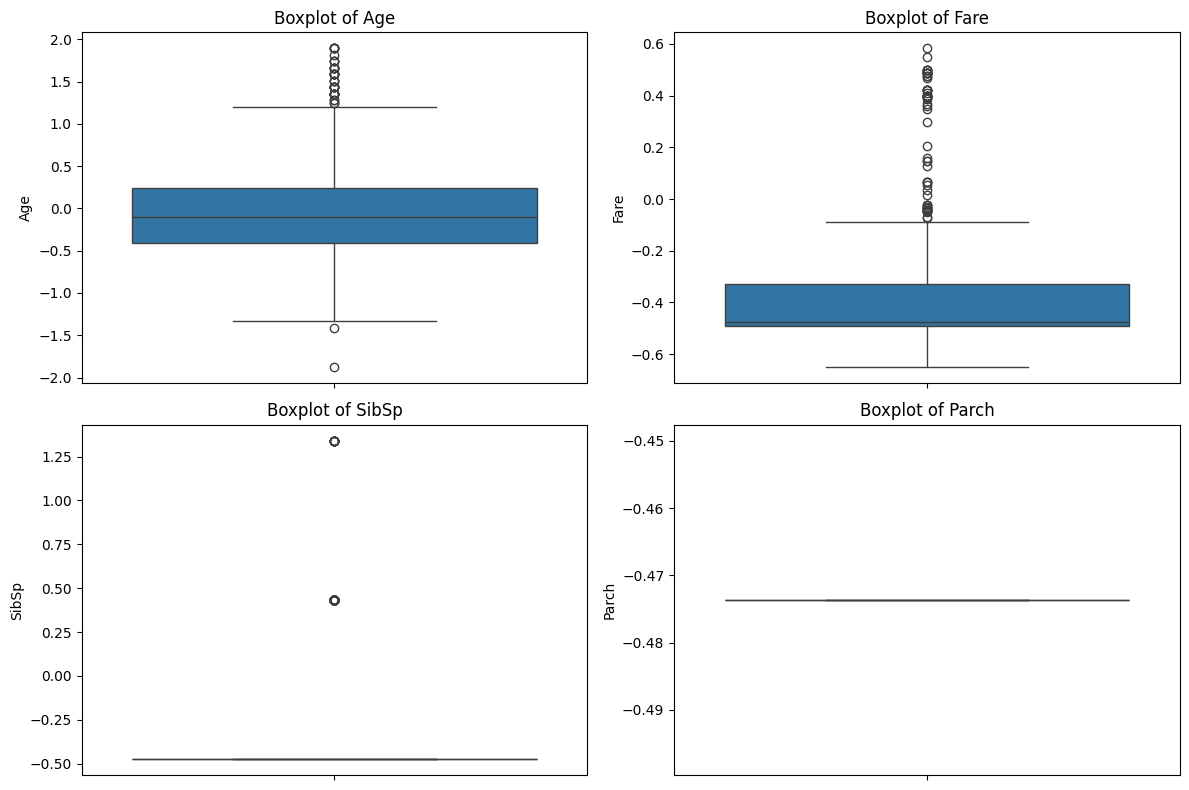

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Remove outliers
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# Visualize boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_clean[col], ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()